In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn



In [6]:
news = pd.read_csv("C:/Users/antoi/Desktop/Projektrealisierung-2/notebooks für das Trainieren der Klassifikation und Zusammenfassung/Trainings und Testdaten/ergbnisse/test_news_neu.csv")
science = pd.read_csv("C:/Users/antoi/Desktop/Projektrealisierung-2/notebooks für das Trainieren der Klassifikation und Zusammenfassung/Trainings und Testdaten/ergbnisse/test_science.csv")
review = pd.read_csv("C:/Users/antoi/Desktop/Projektrealisierung-2/notebooks für das Trainieren der Klassifikation und Zusammenfassung/Trainings und Testdaten/ergbnisse/test_review_text.csv")
story = pd.read_csv("C:/Users/antoi/Desktop/Projektrealisierung-2/notebooks für das Trainieren der Klassifikation und Zusammenfassung/Trainings und Testdaten/ergbnisse/test_story.csv")

In [16]:
news.columns

Index(['Unnamed: 0', 'text_rank_text', 'token_text_rank', 'Zusammenfassung',
       'länge Zusammenfassung', 'text', 'tokens_gesamt',
       'desired_compression_rate', 'ent_com_rate', 'ent_com_rate_neu'],
      dtype='object')

In [17]:
df = pd.concat([news,science,review,story])[['text_rank_text', 'token_text_rank', 'Zusammenfassung',
       'länge Zusammenfassung', 'text', 'tokens_gesamt',
       'desired_compression_rate', 'ent_com_rate', 'ent_com_rate_neu']]

In [18]:
df

,text_rank_text,token_text_rank,Zusammenfassung,länge Zusammenfassung,text,tokens_gesamt,desired_compression_rate,ent_com_rate,ent_com_rate_neu
0,RJD Chief Lalu Prasad Yadav on Wednesday said ...,31,RJD Chief Lalu Prasad Yadav on Wednesday said ...,31,RJD Chief Lalu Prasad Yadav on Wednesday said ...,58,0.54,0.534483,0.534483
1,The Indira Gandhi International Airport has cl...,30,The Indira Gandhi International Airport has cl...,30,The Indira Gandhi International Airport has cl...,59,0.46,0.508475,0.508475
2,"State run buses, school buses, and vehicles us...",34,"State run buses, school buses, and vehicles us...",34,Mumbai Traffic Police have temporarily banned ...,63,0.55,0.539683,0.539683
3,Titanic actors Leonardo DiCaprio and Kate Wins...,21,Titanic actors Leonardo DiCaprio and Kate Wins...,21,Titanic actors Leonardo DiCaprio and Kate Wins...,61,0.32,0.344262,0.344262
4,A member of Sikh communitys Damdami Taksal sem...,33,A member of Sikh communitys Damdami Taksal sem...,35,A member of Sikh communitys Damdami Taksal sem...,59,0.69,0.593220,0.559322
...,...,...,...,...,...,...,...,...,...
195,I Captain Parrol Hartroy stood at the advanced...,1974,i captain parrol hartroy stood at the advanced...,1749,I Captain Parrol Hartroy stood at the advanced...,2529,0.63,0.691578,NaN
196,"You are not the first to explore this region, ...",870,"You are not the first to explore this region, ...",579,A man stepped out of the darkness into the lit...,1936,0.24,0.299070,NaN
197,One midsummer night a farmers boy living about...,2105,A farmers boy living about ten miles from the ...,2190,One midsummer night a farmers boy living about...,2499,0.71,0.876351,NaN
198,Nobody has lived in it since the summer of 187...,1281,The house was occupied by the family of charle...,1362,To the south of where the road between Leesvil...,1524,0.70,0.893701,NaN


In [19]:
# Spalten extrahieren

endgueltige_kompressionsrate = df['ent_com_rate']
min_kompressionsrate = df['desired_compression_rate'] - 0.05
max_kompressionsrate = df['desired_compression_rate'] + 0.05

# Zeile hinzufügen, um den Bereich zu kennzeichnen
df['Bereich'] = ""
for i in range(len(df)):
    if endgueltige_kompressionsrate[i] < min_kompressionsrate[i]:
        df.at[i, 'Bereich'] = 'Drunter'
    elif min_kompressionsrate[i] <= endgueltige_kompressionsrate[i] <= max_kompressionsrate[i]:
        df.at[i, 'Bereich'] = 'Zwischen'
    else:
        df.at[i, 'Bereich'] = 'Drüber'

# Berechne die prozentualen Anteile der Bereiche
counts = df['Bereich'].value_counts(normalize=True) * 100

# Plot: Prozentuale Anteile der Bereiche
plt.bar(counts.index, counts.values)
plt.xlabel('Bereich')
plt.ylabel('Prozent')
plt.title('Prozentuale Verteilung der Endgültigen Compression Rate-Bereiche')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

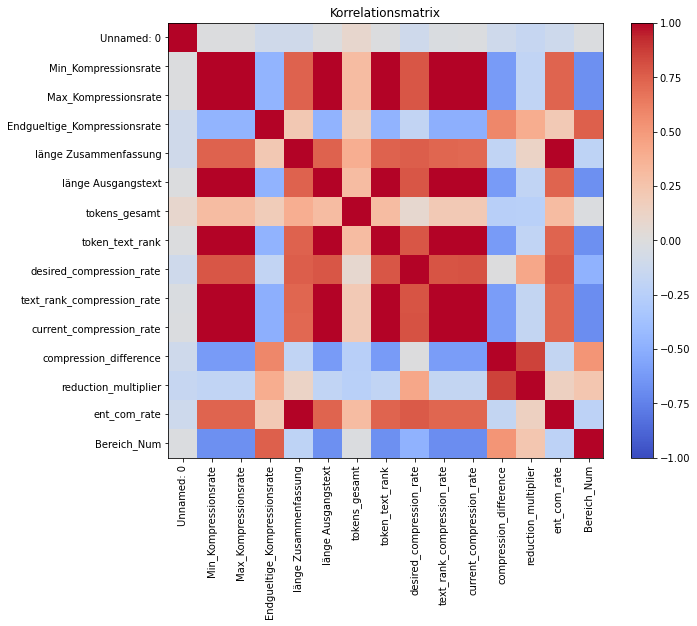

In [21]:
# Spalte "Bereich" in numerische Kategorien umwandeln
df['Bereich_Num'] = df['Bereich'].map({'Drunter': 0, 'Zwischen': 1, 'Drüber': 2})

# Korrelationsmatrix berechnen
correlation_matrix = df.corr()

# Plot: Korrelationsmatrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Korrelationsmatrix')
plt.show()

In [80]:
# Textlänge in Kategorien einteilen: lang und kurz
df['Textlänge_Kategorie'] = pd.cut(df['länge Ausgangstext'], bins=[0, 50, float('inf')], labels=['Kurz', 'Lang'])

# Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung = df.groupby(['Textlänge_Kategorie', 'Bereich'])['Bereich'].count().unstack()

# Anteilswerte berechnen
verteilung_prozent = verteilung.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot: Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung_prozent.plot(kind='bar', stacked=True)
plt.xlabel('Textlänge-Kategorie')
plt.ylabel('Anteil in %')
plt.title('Anteilige Verteilung der Bereich-Spalte nach Textlänge-Kategorie')
plt.legend(title='Bereich')
plt.show()

KeyError: 'länge Ausgangstext'

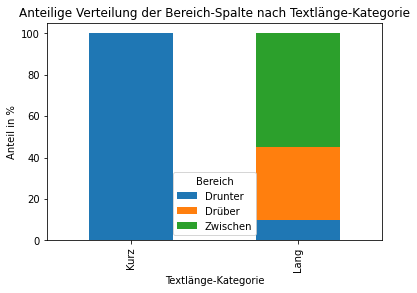

In [81]:
# Textlänge in Kategorien einteilen: lang und kurz
df['Textlänge_Kategorie'] = pd.cut(df['tokens_gesamt'], bins=[0, 50, float('inf')], labels=['Kurz', 'Lang'])

# Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung = df.groupby(['Textlänge_Kategorie', 'Bereich'])['Bereich'].count().unstack()

# Anteilswerte berechnen
verteilung_prozent = verteilung.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot: Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung_prozent.plot(kind='bar', stacked=True)
plt.xlabel('Textlänge-Kategorie')
plt.ylabel('Anteil in %')
plt.title('Anteilige Verteilung der Bereich-Spalte nach Textlänge-Kategorie')
plt.legend(title='Bereich')
plt.show()

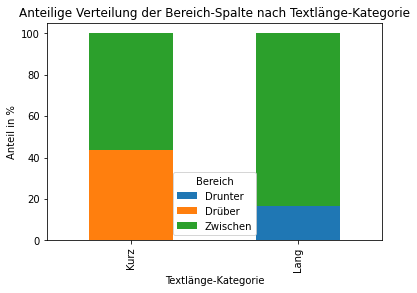

In [31]:
# Textlänge in Kategorien einteilen: lang und kurz
df['Textlänge_Kategorie'] = pd.cut(df['Min_Kompressionsrate'], bins=[0, 50, float('inf')], labels=['Kurz', 'Lang'])

# Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung = df.groupby(['Textlänge_Kategorie', 'Bereich'])['Bereich'].count().unstack()

# Anteilswerte berechnen
verteilung_prozent = verteilung.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot: Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung_prozent.plot(kind='bar', stacked=True)
plt.xlabel('Textlänge-Kategorie')
plt.ylabel('Anteil in %')
plt.title('Anteilige Verteilung der Bereich-Spalte nach Textlänge-Kategorie')
plt.legend(title='Bereich')
plt.show()

In [69]:
df["Differenz"] = abs(df["ent_com_rate"]*100 - (df["desired_compression_rate"]*100))

In [70]:

mittelwert = df['Differenz'].mean()
standardabweichung = df['Differenz'].std()

# Ausgabe der Ergebnisse
print("Mittelwert:", mittelwert)
print("Standardabweichung:", standardabweichung)


Mittelwert: 5.817825698941135
Standardabweichung: 4.7139328192528


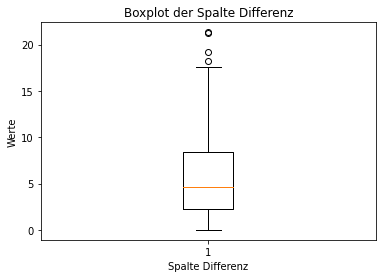

In [71]:
# Annahme: df ist der DataFrame, für den du den Boxplot der Spalte 'Differenz' erstellen möchtest

# Boxplot erstellen
plt.boxplot(df['Differenz'])

# Achsentitel setzen
plt.xlabel('Spalte Differenz')
plt.ylabel('Werte')

# Titel setzen
plt.title('Boxplot der Spalte Differenz')

# Boxplot anzeigen
plt.show()


In [76]:
import math
df["Test"] = (df["tokens_gesamt"]*df["desired_compression_rate"])

In [78]:
df

,Unnamed: 0,text_rank_text,token_text_rank,Zusammenfassung,länge Zusammenfassung,text,tokens_gesamt,desired_compression_rate,ent_com_rate,ent_com_rate_neu,Bereich,Differenz,Test
0,0,RJD Chief Lalu Prasad Yadav on Wednesday said ...,31,RJD Chief Lalu Prasad Yadav on Wednesday said ...,31,RJD Chief Lalu Prasad Yadav on Wednesday said ...,58,0.54,0.534483,0.534483,Zwischen,0.551724,31.32
1,1,The Indira Gandhi International Airport has cl...,30,The Indira Gandhi International Airport has cl...,30,The Indira Gandhi International Airport has cl...,59,0.46,0.508475,0.508475,Zwischen,4.847458,27.14
2,2,"State run buses, school buses, and vehicles us...",34,"State run buses, school buses, and vehicles us...",34,Mumbai Traffic Police have temporarily banned ...,63,0.55,0.539683,0.539683,Zwischen,1.031746,34.65
3,3,Titanic actors Leonardo DiCaprio and Kate Wins...,21,Titanic actors Leonardo DiCaprio and Kate Wins...,21,Titanic actors Leonardo DiCaprio and Kate Wins...,61,0.32,0.344262,0.344262,Zwischen,2.426230,19.52
4,4,A member of Sikh communitys Damdami Taksal sem...,33,A member of Sikh communitys Damdami Taksal sem...,35,A member of Sikh communitys Damdami Taksal sem...,59,0.69,0.593220,0.559322,Drunter,9.677966,40.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,Nine people were killed and 22 injured on Satu...,38,Nine people were killed and 22 injured on Satu...,38,Nine people were killed and 22 injured on Satu...,58,0.63,0.655172,0.655172,Zwischen,2.517241,36.54
196,196,External Affairs Minister Sushma Swaraj had ea...,12,External Affairs Minister Sushma Swaraj had ea...,12,The Union Minister of State for Social Justice...,55,0.24,0.218182,0.218182,Zwischen,2.181818,13.20
197,197,India womens team captain Mithali Raj has beco...,42,India womens team captain Mithali Raj has beco...,42,India womens team captain Mithali Raj has beco...,59,0.71,0.711864,0.711864,Zwischen,0.186441,41.89
198,198,"A class 10 student from Bihar, who got 0 in Ma...",49,"A class 10 student from Bihar, who got 0 in Ma...",49,"A class 10 student from Bihar, who got 0 in Ma...",57,0.70,0.859649,0.859649,Drüber,15.964912,39.90
